## Solvers' Testing

In [1]:
# Add locations of modules
push!(LOAD_PATH, "../src/")

4-element Array{String,1}:
 "@"      
 "@v#.#"  
 "@stdlib"
 "../src/"

## Random Regular Graphs

In [2]:
using Revise
import Random

In [4]:
using GraphicalModelLearning
using LightGraphs
#using Junet

┌ Info: Precompiling GraphicalModelLearning [73787735-dbe8-5e05-9488-dc58b1b075d0]
└ @ Base loading.jl:1192
┌ Info: Recompiling stale cache file /Users/gogol/.julia/compiled/v1.0/LightGraphs/Xm08G.ji for LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1190


In [5]:
@time rand_reg_gm = random_regular_graph(8,3)

  0.288289 seconds (712.09 k allocations: 36.171 MiB, 2.33% gc time)


{8, 12} undirected simple Int64 graph

In [31]:
adj_matrix = adjacency_matrix(rand_reg_gm)

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625


8×8 SparseArrays.SparseMatrixCSC{Int64,Int64} with 24 stored entries:
  [4, 1]  =  1
  [6, 1]  =  1
  [7, 1]  =  1
  [5, 2]  =  1
  [6, 2]  =  1
  [8, 2]  =  1
  [4, 3]  =  1
  [6, 3]  =  1
  [7, 3]  =  1
  [1, 4]  =  1
  [3, 4]  =  1
  [5, 4]  =  1
  [2, 5]  =  1
  [4, 5]  =  1
  [8, 5]  =  1
  [1, 6]  =  1
  [2, 6]  =  1
  [3, 6]  =  1
  [1, 7]  =  1
  [3, 7]  =  1
  [8, 7]  =  1
  [2, 8]  =  1
  [5, 8]  =  1
  [7, 8]  =  1

In [32]:
adj_matrix = Matrix(adj_matrix)

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625


8×8 Array{Int64,2}:
 0  0  0  1  0  1  1  0
 0  0  0  0  1  1  0  1
 0  0  0  1  0  1  1  0
 1  0  1  0  1  0  0  0
 0  1  0  1  0  0  0  1
 1  1  1  0  0  0  0  0
 1  0  1  0  0  0  0  1
 0  1  0  0  1  0  1  0

In [33]:
# Number of samples
n_samples = 10000

# Regular sampling
model = FactorGraph(adj_matrix)
t1 = @elapsed samples1 = sample(model, n_samples)

# Sample using the Gibbs Sampler
t2 = @elapsed samples_time_series, nodes_updated_time_series = gibbs_sampling(model, n_samples)

# T-regime sampling
t3 = @elapsed samples_T, samples_mixed = gibbs_sampling(model, n_samples, T_regime())

println(t1)
println(t2)
println(t3)

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625
┌ Info: assuming spin alphabet
└ @ GraphicalModelLearning /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/models.jl:108
┌ Info: using Glauber dynamics v1 to generate samples
└ @ GraphicalModelLearning /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/sampling.jl:262
┌ Info: using Glauber dynamics v1 to generate T-regime samples
└ @ GraphicalModelLearning /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/sampling.jl:328


0.000547637
0.030056286
0.079208523


In [34]:
samples_T[:,1]/sum(samples_T[:,1])

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625


117-element Array{Float64,1}:
 0.0005000500050005    
 0.00010001000100010001
 0.00010001000100010001
 0.00010001000100010001
 0.00030003000300030005
 0.12041204120412041   
 0.00010001000100010001
 0.00010001000100010001
 0.00010001000100010001
 0.00020002000200020003
 0.00020002000200020003
 0.00020002000200020003
 0.00010001000100010001
 ⋮                     
 0.00010001000100010001
 0.00010001000100010001
 0.00030003000300030005
 0.00020002000200020003
 0.00020002000200020003
 0.00040004000400040005
 0.00010001000100010001
 0.00010001000100010001
 0.00010001000100010001
 0.0009000900090009    
 0.00010001000100010001
 0.0007000700070007    

In [19]:
samples1[:,1]/sum(samples1[:,1])

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625


170-element Array{Float64,1}:
 0.0001
 0.0001
 0.0007
 0.0013
 0.0002
 0.0009
 0.0002
 0.0001
 0.0001
 0.0001
 0.0001
 0.0002
 0.0001
 ⋮     
 0.0001
 0.0001
 0.0009
 0.0009
 0.0001
 0.0001
 0.0002
 0.001 
 0.0003
 0.0001
 0.0012
 0.0001

### Learning on iid samples

In [19]:
# Can the FactorGraph be recovered?
@time learned1 = learn(samples1)
@time learned2 = learn(samples2)

@time learned_cgd_rise1 = learn_cgd(samples1)
@time learned_cgd_rise2 = learn_cgd(samples2)

@time learned_cgd_rple1 = learn_cgd(samples1, RPLE())
@time learned_cgd_rple2 = learn_cgd(samples2, RPLE())

@time learned_cgd_logrise1 = learn_cgd(samples1, logRISE())
@time learned_cgd_logrise2 = learn_cgd(samples2, logRISE())

println(learned1)
println(learned2)

println(learned_cgd_rise1)
println(learned_cgd_rise2)

println(learned_cgd_rple1)
println(learned_cgd_rple2)

println(learned_cgd_logrise1)
println(learned_cgd_logrise2)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

  8.047059 seconds (5.29 M allocations: 268.768 MiB, 1.39% gc time)
  0.095808 seconds (64.97 k allocations: 6.232 MiB)


INFO: using coordinate gradient solver for RISE


  2.584218 seconds (2.16 M allocations: 72.799 MiB, 1.13% gc time)


INFO: using coordinate gradient solver for RISE


  0.162536 seconds (2.53 M allocations: 45.543 MiB, 9.48% gc time)


INFO: using coordinate gradient solver for RPLE


  0.420464 seconds (1.92 M allocations: 40.500 MiB, 3.64% gc time)


INFO: using coordinate gradient solver for RPLE


  0.185423 seconds (2.90 M allocations: 53.846 MiB, 12.45% gc time)


INFO: using coordinate gradient solver for logRISE


  0.453969 seconds (1.92 M allocations: 38.892 MiB, 3.87% gc time)


INFO: using coordinate gradient solver for logRISE


  0.162225 seconds (3.66 M allocations: 62.366 MiB, 9.44% gc time)
[0.227245 0.919767 1.038 2.50409e-7 0.987622 3.6009e-7 6.8341e-7 9.79434e-7; 0.919767 -0.0985186 0.908888 7.29949e-7 0.0511394 0.735251 1.18592e-6 0.00736873; 1.038 0.908888 -0.115607 1.00851e-7 0.884759 0.313083 0.0852148 6.8941e-7; 2.50409e-7 7.29949e-7 1.00851e-7 -0.0679804 0.241231 1.20144 0.862605 1.01935; 0.987622 0.0511394 0.884759 0.241231 0.0717132 4.39215e-7 0.751784 1.14434e-6; 3.6009e-7 0.735251 0.313083 1.20144 4.39215e-7 0.104493 8.35195e-7 0.85966; 6.8341e-7 1.18592e-6 0.0852148 0.862605 0.751784 8.35195e-7 0.0256249 1.01544; 9.79434e-7 0.00736873 6.8941e-7 1.01935 1.14434e-6 0.85966 1.01544 -0.0960668]
[0.0338049 0.641332 1.14101 0.0915603 0.71679 2.52202e-7 0.071581 1.22996e-6; 0.641332 0.0627001 1.32795 0.146807 1.14754e-6 0.8086 2.47552e-7 1.72283e-5; 1.14101 1.32795 0.00138725 1.24131e-6 0.895039 2.70306e-7 2.38754e-7 2.46593e-7; 0.0915603 0.146807 1.24131e-6 0.0967431 5.4848e-7 1.0017 0.68411 1.0342

In [20]:
@time learned_cd_rise1 = learn(samples1, RISE(), CD(1e-12))
@time learned_cd_rise2 = learn(samples2, RISE(), CD(1e-12))

@time learned_cd_rise1 = learn(samples1, logRISE(), CD(1e-12))
@time learned_cd_rise2 = learn(samples2, logRISE(), CD(1e-12))

#println(learned_cd_rise1)
#println(learned_cd_rise2)

INFO: using coordinate descent solver for RISE


  0.506154 seconds (1.01 M allocations: 25.020 MiB, 3.29% gc time)
  0.026592 seconds (839.85 k allocations: 13.280 MiB)


INFO: using coordinate descent solver for RISE


  0.455566 seconds (1.54 M allocations: 31.679 MiB, 3.63% gc time)
  0.074698 seconds (1.97 M allocations: 31.025 MiB, 10.88% gc time)


INFO: using coordinate descent solver for logRISE
INFO: using coordinate descent solver for logRISE


8×8 Array{Float64,2}:
  0.0611545   0.7515       1.2258      …   0.302001    -0.0914953 
  0.7515      0.103463     1.32034        -0.172457     0.00285716
  1.2258      1.32034      0.0281853       0.158962    -0.206997  
  0.36289     0.367635     0.00239359      0.562663     0.897943  
  0.71081     0.0900269    0.824706        0.689886     0.285437  
 -0.0356429   0.583505    -0.0495673   …   0.347584     1.07435   
  0.302001   -0.172457     0.158962        0.00452694   0.922803  
 -0.0914953   0.00285716  -0.206997        0.922803    -0.214514  

### Learning on correlated samples -- T-regime

In [35]:
using GraphicalModelLearning

Random.seed!(0)

# Define Graphical Model
model = FactorGraph(adj_matrix)
n_samples = 10000

# Gibbs Samples
samples_T, samples_mixed = gibbs_sampling(model, n_samples, T_regime())

print("Done sampling")

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625
┌ Info: assuming spin alphabet
└ @ GraphicalModelLearning /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/models.jl:108
┌ Info: using Glauber dynamics v1 to generate T-regime samples
└ @ GraphicalModelLearning /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/sampling.jl:328


Done sampling

In [36]:
samples_T

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625


145×18 Array{Int64,2}:
    2  7  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1
    1  1  -1   1  -1  -1   1  -1  -1   1  -1   1  -1  -1   1  -1  -1   1
    1  4   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1
    4  4  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1
    4  3  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1
    2  6  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1
    5  3  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1
    1  7   1  -1   1  -1  -1   1  -1  -1   1  -1   1  -1  -1   1   1  -1
    2  4  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1
 1207  8  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
    1  1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1
    1  2  -1  -1   1   1  -1   1  -1  -1  -1  -1   1   1  -1   1  -1  -1
    5  5  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1
    ⋮                  ⋮    

In [37]:
samples_mixed

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625


27×9 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
    5   1  -1  -1  -1  -1  -1  -1  -1
   19  -1  -1   1  -1  -1  -1   1  -1
   24  -1  -1  -1  -1  -1   1  -1  -1
    1   1  -1   1  -1  -1   1   1   1
   22  -1   1  -1  -1  -1  -1  -1  -1
    7   1  -1   1  -1  -1   1   1  -1
    4  -1   1  -1  -1  -1   1   1   1
    7  -1  -1  -1  -1   1  -1  -1  -1
 9709  -1  -1  -1  -1  -1  -1  -1  -1
    3  -1  -1  -1  -1  -1  -1  -1   1
    2   1  -1  -1   1   1  -1  -1  -1
    7  -1   1  -1  -1  -1   1  -1  -1
   14  -1   1  -1  -1   1  -1  -1   1
    ⋮                   ⋮            
   32  -1  -1  -1  -1  -1  -1   1  -1
   57  -1  -1  -1   1  -1  -1  -1  -1
    7  -1  -1   1   1  -1   1  -1  -1
    9  -1  -1  -1   1   1  -1  -1  -1
   40  -1  -1   1  -1  -1  -1  -1  -1
    2   1  -1   1  -1  -1   1  -1  -1
    3  -1   1  -1   1   1  -1  -1   1
   12  -1  -1   1  -1  -1   1  -1  -1
    2   1  -1  -1  -1  -1   1   1   1
    2  -1  -1  -1  -1  -1   1   1   1
    4  -1  -1   1   1  -1  -1  -1  -1


In [38]:
@time learned3 = learn_glauber_dynamics(samples_T, RISE())

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625
┌ Info: using JuMP for RISE to learn Glauber dynamics
└ @ GraphicalModelLearning /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/GraphicalModelLearning.jl:359


  0.650411 seconds (774.17 k allocations: 38.218 MiB, 4.03% gc time)


8×8 Array{Float64,2}:
 -1.66617     -1.39832e-8   0.0906876   …   2.8685e-7    0.289621  
 -1.39832e-8  -1.5635      -2.05481e-8      6.03221e-8   0.877261  
  0.0906876   -2.05481e-8  -0.876533        0.961489     3.89371e-7
  1.56671e-5   1.44632e-6   0.582279       -1.74247e-8   0.20984   
  0.273631     0.775498    -1.10424e-8     -2.61874e-9   0.528934  
  0.335892     0.245449     0.931555    …   1.28555e-7   6.41255e-7
  2.8685e-7    6.03221e-8   0.961489       -2.16092      5.41278e-7
  0.289621     0.877261     3.89371e-7      5.41278e-7  -1.28431   

In [40]:
learned3[1,4]

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625


1.5667148153007594e-5

In [39]:
model

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/inv.jl
│   /Users/gogol/.julia/packages/StaticArrays/1g9bq/src/eigen.jl
└ @ Revise /Users/gogol/.julia/packages/Revise/2NCCI/src/Revise.jl:625


alphabet: spin
vars: 8
terms: 12


  (1, 4) => 1
  (1, 6) => 1
  (1, 7) => 1
  (2, 5) => 1
  (2, 6) => 1
  (2, 8) => 1
  (3, 4) => 1
  (3, 6) => 1
  (3, 7) => 1
  (4, 5) => 1
  (5, 8) => 1
  (7, 8) => 1


In [9]:
@time learned3 = learn_glauber_dynamics(samples_T, logRISE())

INFO: using JuMP for logRISE


  0.313465 seconds (114.76 k allocations: 6.823 MiB, 2.70% gc time)


8×8 Array{Float64,2}:
 -2.14028     -1.58889e-8  -1.25146e-8  …  -1.2846e-8   -4.14576e-8
 -1.58889e-8  -3.57496     -6.30509e-9     -6.37001e-9  -2.43378e-8
 -1.25146e-8  -6.30509e-9  -2.17605        -1.01177e-8   0.405864  
  0.900082    -6.33267e-9  -9.66594e-9     -1.23705e-8  -2.25825e-8
 -1.42339e-8  -1.09161e-8  -1.25736e-8     -7.98088e-9  -3.29126e-8
  0.411487    -1.16774e-8  -9.43972e-8  …  -4.95636e-9   0.825051  
 -1.2846e-8   -6.37001e-9  -1.01177e-8     -2.84051     -6.94594e-9
 -4.14576e-8  -2.43378e-8   0.405864       -6.94594e-9  -2.06763   

In [10]:
@time learned4 = learn_glauber_dynamics(samples_T, RISE(), CD(1e-12))

INFO: using coordinate descent solver for RISE to learn Glauber dyamics


  0.607383 seconds (503.11 k allocations: 21.713 MiB, 1.27% gc time)


8×8 Array{Float64,2}:
 -0.107197   0.0          1.22241    …   0.340173     0.415589   0.0       
  0.0       -0.153018     0.0            0.00799899   0.436205   0.00360506
  1.22241    0.0         -0.0769112      0.116601     0.323976   0.0858942 
  1.38093    1.44171     -0.0285571      0.180543     0.999278   0.0       
  0.0       -0.0032805    0.0            0.00285637   1.28094   -0.00283887
  0.340173   0.00799899   0.116601   …  -1.17865      0.0        0.457078  
  0.415589   0.436205     0.323976       0.0         -0.085957   1.25764   
  0.0        0.00360506   0.0858942      0.457078     1.25764   -0.00890197

In [11]:
@time learned4 = learn_glauber_dynamics(samples_T, logRISE(), CD(1e-12))

INFO: using coordinate descent solver for logRISE to learn Glauber dyamics


  0.553011 seconds (581.64 k allocations: 20.930 MiB, 1.37% gc time)


8×8 Array{Float64,2}:
 -0.0285953  -0.0642272   0.248019   …   0.0553199   1.4514     -0.116781 
 -0.0642272  -2.1239      0.179769       0.357494    0.0229146   0.940404 
  0.248019    0.179769   -0.554528      -0.0716104   0.0         0.49142  
  1.1854      0.340155    0.231909       0.0261319   0.0299458   0.0      
  0.622822    0.0134102   0.215414      -0.0614097   0.0052145   0.251611 
  0.0553199   0.357494   -0.0716104  …  -0.186637    1.31801     0.248352 
  1.4514      0.0229146   0.0            1.31801    -2.84051     0.0700877
 -0.116781    0.940404    0.49142        0.248352    0.0700877  -0.0321256

In [12]:
learned4 = learn(samples_mixed)

8×8 Array{Float64,2}:
 -2.02741     -1.16768e-7  -7.00789e-9  …  -1.09769e-7  -1.87821e-8
 -1.16768e-7  -3.18771     -3.12858e-8     -2.33222e-8  -2.19874e-7
 -7.00789e-9  -3.12858e-8  -2.92007        -2.98532e-8   1.3566e-7 
  0.265045    -6.33775e-8  -6.13265e-9     -6.00668e-8  -1.14809e-8
 -5.91102e-9  -2.208e-8    -4.04959e-9     -2.11606e-8  -7.89675e-9
  0.506052    -1.93894e-7  -7.94019e-9  …  -1.80874e-7   0.684217  
 -1.09769e-7  -2.33222e-8  -2.98532e-8     -3.2504      -2.04171e-7
 -1.87821e-8  -2.19874e-7   1.3566e-7      -2.04171e-7  -1.9471    

In [30]:
model

alphabet: spin
vars: 8
terms: 12


  (1, 2) => 1
  (1, 3) => 1
  (1, 5) => 1
  (2, 3) => 1
  (2, 6) => 1
  (3, 5) => 1
  (4, 6) => 1
  (4, 7) => 1
  (4, 8) => 1
  (5, 7) => 1
  (6, 8) => 1
  (7, 8) => 1


In [61]:
@time learned4 = learn_glauber_dynamics_cgd(samples_T)

  0.011214 seconds (91.09 k allocations: 1.962 MiB)


INFO: using coordinate gradient solver for RISE


3×3 Array{Float64,2}:
 0.0137192   0.856471    0.0612671
 0.856471   -0.027355    0.0979819
 0.0612671   0.0979819  -0.0173443

In [11]:
@time learned5 = learn_glauber_dynamics_cgd(samples_T, RISE(), 8.0, 1e-10)

INFO: using coordinate gradient solver for RISE


  0.018075 seconds (113.89 k allocations: 2.454 MiB)


3×3 Array{Float64,2}:
 0.0137234   0.856503    0.0613336
 0.856503   -0.0273728   0.0978732
 0.0613336   0.0978732  -0.0173494

In [12]:
@time learned5 = learn_glauber_dynamics_cgd(samples_T, RISE(), 8.0, 1e-11)

  0.017757 seconds (129.83 k allocations: 2.797 MiB)


INFO: using coordinate gradient solver for RISE


3×3 Array{Float64,2}:
 0.0137237   0.85651     0.0613362
 0.85651    -0.0273761   0.0978637
 0.0613362   0.0978637  -0.0173498

In [13]:
@time learned5 = learn_glauber_dynamics_cgd(samples_T, RPLE())

INFO: using coordinate gradient solver for RPLE


  0.317433 seconds (275.36 k allocations: 11.259 MiB, 3.64% gc time)


3×3 Array{Float64,2}:
 0.0191458   0.860655   0.0656544
 0.860655   -0.030531   0.101443 
 0.0656544   0.101443  -0.0236575

In [14]:
@time learned5 = learn_glauber_dynamics_cgd(samples_T, RPLE(), 8.0, 1e-10)

  0.022029 seconds (170.83 k allocations: 3.840 MiB)


INFO: using coordinate gradient solver for RPLE


3×3 Array{Float64,2}:
 0.0192199   0.860844    0.0656448
 0.860844   -0.0305775   0.101365 
 0.0656448   0.101365   -0.0236612

In [15]:
@time learned5 = learn_glauber_dynamics_cgd(samples_T, logRISE())

INFO: using coordinate gradient solver for logRISE


  0.431719 seconds (381.82 k allocations: 15.108 MiB, 1.86% gc time)


3×3 Array{Float64,2}:
 0.00453186   0.848603    0.0532006
 0.848603    -0.0189449   0.0907966
 0.0532006    0.0907966  -0.0046365

In [16]:
@time learned5 = learn_glauber_dynamics_cgd(samples_T, logRISE(), 8.0, 1e-10)

  0.024551 seconds (245.76 k allocations: 4.840 MiB)


INFO: using coordinate gradient solver for logRISE


3×3 Array{Float64,2}:
 0.00453198   0.848603    0.0533993 
 0.848603    -0.0189449   0.0906347 
 0.0533993    0.0906347  -0.00464917

### Learning on correlated samples -- M-regime

In [25]:
using GraphicalModelLearning

srand(0)

# Define Graphical Model
model = FactorGraph(adj_matrix)

n_samples = 10000

# Gibbs Samples
samples_M, samples_mixed = gibbs_sampling(model, n_samples, M_regime())

print("Done sampling")

INFO: assuming spin alphabet
INFO: using Glauber dynamics v1 to generate M-regime samples


Done sampling

In [26]:
samples_M

9999×42 Array{Int64,2}:
 1  14   1   1  -1   1  -1   1  -1  -1  …   1   1   1   1   1  -1  -1   1   1
 1   6  -1   1  -1   1  -1   1   1   1     -1   1   1  -1   1   1  -1  -1   1
 1   4  -1  -1   1   1  -1   1  -1  -1      1  -1  -1   1  -1   1   1   1   1
 1  17   1  -1  -1   1   1  -1   1  -1      1  -1  -1   1  -1   1  -1  -1  -1
 1   9   1  -1  -1   1  -1   1  -1  -1      1   1  -1  -1  -1   1   1   1   1
 1  19   1   1   1   1  -1   1  -1  -1  …  -1   1   1  -1  -1  -1  -1   1   1
 1   2  -1  -1   1   1   1   1  -1  -1      1   1   1   1   1   1  -1  -1  -1
 1  13   1  -1  -1   1  -1  -1   1  -1      1  -1   1  -1   1  -1   1  -1  -1
 1   5  -1   1  -1   1  -1   1  -1  -1      1  -1  -1   1  -1  -1  -1  -1  -1
 1  20   1  -1   1   1   1  -1  -1  -1      1  -1   1  -1  -1  -1  -1  -1  -1
 1   4   1  -1  -1   1   1  -1   1   1  …   1  -1   1  -1  -1   1  -1  -1   1
 1  13  -1  -1  -1  -1   1   1   1   1      1   1   1   1   1  -1   1  -1  -1
 1   7   1  -1   1   1  -1   1  -1   1  

In [14]:
samples_T

163×18 Array{Int64,2}:
    1  2  -1  -1   1  -1   1   1   1   1  -1  -1   1  -1   1   1   1   1
    1  5  -1  -1  -1   1   1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1
    5  5  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1
    4  8  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1
    4  7  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1
    9  8   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1
    2  6  -1  -1  -1  -1   1   1   1   1  -1  -1  -1  -1   1   1   1   1
    2  1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1
    2  4  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1
   16  6   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1
    1  7  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1   1   1
    3  3  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1
    2  8   1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1   1
    ⋮                  ⋮    

In [34]:
samples_mixed

256×9 Array{Int64,2}:
 28   1   1  -1   1  -1  -1  -1  -1
 25  -1   1   1  -1  -1  -1  -1   1
 15  -1   1   1   1   1  -1  -1   1
 45  -1  -1  -1  -1  -1   1  -1   1
 45   1   1   1  -1   1  -1   1   1
 54   1  -1   1   1   1  -1  -1  -1
 24   1   1  -1  -1  -1  -1  -1   1
 42   1  -1  -1   1   1   1   1   1
 60   1   1   1   1  -1  -1   1   1
 42   1  -1   1   1  -1   1  -1   1
 26  -1   1  -1   1  -1  -1   1  -1
 47   1  -1  -1   1  -1  -1   1   1
 33  -1  -1  -1  -1   1   1  -1   1
  ⋮                   ⋮            
 41  -1   1   1  -1  -1  -1  -1  -1
 38  -1  -1  -1   1   1  -1  -1  -1
 31   1  -1  -1   1  -1  -1   1  -1
 48   1   1   1  -1   1   1   1  -1
 21  -1  -1   1   1   1  -1  -1   1
 37  -1   1   1   1   1  -1   1   1
 64   1  -1   1  -1   1   1  -1  -1
 19  -1  -1   1  -1   1   1   1  -1
 94   1   1   1  -1   1  -1  -1  -1
 24   1   1  -1   1   1  -1  -1  -1
 31  -1   1  -1   1   1  -1   1   1
 30  -1  -1  -1   1   1   1  -1  -1

In [27]:
@time learned1 = learn_glauber_dynamics(samples_M)

INFO: using JuMP for RISE


  2.298626 seconds (2.66 M allocations: 332.616 MiB, 2.69% gc time)


20×20 Array{Float64,2}:
  0.0388512    0.00870654   0.0493433   …   0.0279366    0.0527968
  0.00870654  -0.0329018    0.987954       -0.0103031   -0.0192396
  0.0493433    0.987954     0.112517       -0.018205    -0.0847324
 -0.00879533  -0.0396294    1.02168e-6      1.09041      0.0864478
  1.25811     -0.0621255   -0.0924945      -0.0913268   -0.0340917
  1.2056       0.0364846   -0.0337616   …  -0.0970132   -0.0671585
 -0.0500996    0.955976    -0.0667604      -0.0167749   -0.0620592
  0.0142975   -0.0727978   -1.88203e-7     -0.0519345   -0.0551693
 -0.11876      0.0177317   -0.0308925      -0.0234469    0.0188949
 -0.0219893    0.0501783    1.04195         0.030186     1.03349  
  0.0278061    0.0275522    8.18995e-8  …  -0.0342491   -0.0296666
 -0.0506231   -0.116577     0.0306901       0.00170977   0.040281 
 -0.0200388    0.0494355    0.0400623       0.0672602   -0.023851 
 -0.099498     1.01169      1.04788         1.14959     -0.0289772
 -0.147852    -0.142099     0.111143  

In [28]:
@time learned1 = learn_glauber_dynamics(samples_M, logRISE())

INFO: using JuMP for logRISE


  2.185539 seconds (2.34 M allocations: 327.012 MiB, 2.13% gc time)


20×20 Array{Float64,2}:
  0.0380276    0.0111148    0.0472118   …   0.0270413    0.0545346
  0.0111148   -0.0329318    0.991898       -0.00979286  -0.020563 
  0.0472118    0.991898     0.112604       -0.0181718   -0.0845807
 -0.00675959  -0.0404854    7.93948e-7      1.09507      0.0893189
  1.28237     -0.065243    -0.0987432      -0.0955133   -0.0342325
  1.22588      0.0408683   -0.0375565   …  -0.10394     -0.0723146
 -0.0540723    0.954537    -0.0671695      -0.0176145   -0.0613701
  0.0170568   -0.0717966   -1.2139e-7      -0.0521993   -0.055916 
 -0.121054     0.0164132   -0.0323027      -0.0209276    0.0172811
 -0.0265272    0.0502845    1.04604         0.0301023    1.03973  
  0.0306058    0.0274707    1.12535e-8  …  -0.0355832   -0.0295602
 -0.0543568   -0.117659     0.0314328       0.00221198   0.0425866
 -0.0229177    0.0509078    0.0433814       0.0697187   -0.028575 
 -0.100361     1.01371      1.05285         1.15478     -0.0309909
 -0.148214    -0.14262      0.113337  

In [29]:
@time learned1 = learn_glauber_dynamics(samples_M, RISE(), CD(1e-12))

INFO: using coordinate descent solver for RISE to learn Glauber dyamics


  1.132370 seconds (35.09 M allocations: 552.534 MiB, 4.10% gc time)


20×20 Array{Float64,2}:
  0.0348186    0.0           0.0363082    …   0.0282442    0.0447742 
  0.0         -0.0384663     0.827353         0.0025406   -0.0195566 
  0.0363082    0.827353      0.111036        -0.0203684   -0.074088  
 -0.0179381   -0.0470819     0.0              1.06794      0.0702621 
  1.13054     -0.0545425    -0.0798237       -0.0834131   -0.0286732 
  1.09636      0.0363886    -0.0355044    …  -0.0953366   -0.0634357 
  1.55867e-5   0.757588     -0.0267063       -0.0184366   -0.00945048
  0.0111329   -0.0581917    -0.000488919     -0.0439362   -0.0506859 
 -0.107705     0.0183929    -0.0226795       -0.0140239    0.0220585 
 -0.00954398   0.0427391     0.896237        -0.00205667   0.88754   
  0.0448057    0.000333148   0.0          …  -0.0252357   -0.00953446
 -0.00613567  -0.0524408     0.0318867        0.0          0.0399229 
  0.0          0.0272305     0.0368113        0.0208234   -0.00409929
 -0.0965013    0.847761      0.989018         1.10314     -0.02712

In [30]:
@time learned1 = learn_glauber_dynamics(samples_M, logRISE(), CD(1e-12))

INFO: using coordinate descent solver for logRISE to learn Glauber dyamics


  1.014983 seconds (31.48 M allocations: 496.555 MiB, 3.51% gc time)


20×20 Array{Float64,2}:
 -0.0115896    0.0          0.042632    …   0.0214284     0.00421458
  0.0          0.00478302   0.777157        0.00531416   -0.0125303 
  0.042632     0.777157     0.110432       -0.0363778    -0.0872787 
 -0.0164744   -0.048431     0.0             0.927918      0.0366361 
  1.14522     -0.0554818   -0.0929312      -0.0462327     0.0249675 
  0.684754    -0.00943529  -0.0178918   …  -0.0121938    -0.00151927
 -0.0294319    0.67623     -0.0601508      -0.000238544  -0.00763944
  0.00682953  -0.0353563    0.0            -0.0344352    -0.0381929 
 -0.0977649    0.0164118   -0.0292932      -0.0277172     0.00971197
 -0.021516     0.0489824    0.906263       -0.0161506     0.502371  
  0.0279697    0.0272139    0.0         …  -0.0171973    -0.0561746 
 -0.0409669   -0.0666082    0.0315504      -0.000909184   0.0377637 
 -0.0117998    0.0261024    0.0207544       0.0455852     0.0       
 -0.0987739    0.701989     1.03146         0.770319     -0.0409767 
 -0.136502

In [43]:
learned2 = learn(samples_mixed)

8×8 Array{Float64,2}:
  0.00465255    0.0972572     0.0722597    …  -1.91412e-7    0.0042089  
  0.0972572    -0.0110511     0.0817736       -0.000895533  -0.0105158  
  0.0722597     0.0817736    -0.0068593        6.33638e-7   -0.000545649
  0.000324277  -0.00023672   -1.43143e-8       0.0988495     0.0924632  
  0.0905073    -0.00939208    0.0884557        0.0970257    -0.0162334  
 -6.77981e-6    0.0989508    -0.00013462   …  -0.00989138    0.0747338  
 -1.91412e-7   -0.000895533   6.33638e-7      -0.00560265    0.10102    
  0.0042089    -0.0105158    -0.000545649      0.10102      -0.016173   

In [22]:
@time learned1 = learn_glauber_dynamics_cgd(samples_M)

INFO: using coordinate gradient solver for RISE


  0.401343 seconds (15.37 M allocations: 260.008 MiB, 6.56% gc time)


8×8 Array{Float64,2}:
 -0.0037606    0.723494      0.221074    …   0.00860162   0.00208041
  0.723494     0.0           3.86352        76.1176       0.0       
  0.221074     3.86352      -5.9029          0.0         -0.00269134
 -4.77431      8.7595e67  2221.91            0.0161203    0.00762653
  0.00324366   0.0482178     1.11858         0.0          0.0       
  0.0217352    0.0           0.0         …   0.0          0.0353239 
  0.00860162  76.1176        0.0            -0.0744034    0.0353809 
  0.00208041   0.0          -0.00269134      0.0353809    0.0       

In [66]:
@time learned2 = learn(samples_mixed)

  0.028327 seconds (6.20 k allocations: 397.609 KiB)


3×3 Array{Float64,2}:
 0.0132895   0.496226    0.0197846
 0.496226   -0.0148107   0.0374478
 0.0197846   0.0374478  -0.012612 

### Large N Graphical Models

In [50]:
using GraphicalModelLearning

# Create a random graphical model
N_spins = 10
N_samples = 100000
d_max = 3
density_gm = d_max/N_spins

F1 = sprand(N_spins,N_spins,density_gm)
F1 = 0.5*(F1 + transpose(F1))

F1 = full(F1)

model = FactorGraph(F1)
@time samples1 = sample(model, N_samples)

INFO: assuming spin alphabet


  0.044406 seconds (88.44 k allocations: 6.481 MiB)


1009×11 Array{Int64,2}:
  12  -1   1  -1  -1   1   1  -1  -1   1  -1
  12   1  -1   1   1   1  -1  -1  -1  -1  -1
 166  -1   1  -1   1  -1  -1   1  -1  -1  -1
   5   1  -1  -1   1  -1  -1  -1   1   1   1
  26  -1  -1  -1  -1   1   1  -1   1  -1  -1
   7  -1  -1   1   1   1   1   1  -1   1   1
  11   1  -1   1   1   1  -1  -1  -1   1  -1
   2  -1   1   1   1   1   1  -1  -1   1  -1
   2   1  -1  -1   1  -1   1   1  -1   1   1
 258   1   1   1   1  -1  -1   1   1   1   1
  47  -1   1  -1  -1  -1   1   1  -1   1  -1
  70  -1   1  -1  -1  -1   1   1  -1  -1   1
  25   1   1  -1  -1   1   1  -1  -1  -1   1
   ⋮                   ⋮                   ⋮
   4  -1  -1   1   1  -1   1  -1  -1   1   1
  10  -1  -1  -1   1   1   1   1  -1  -1   1
  11  -1  -1   1  -1   1   1   1   1   1   1
  16  -1   1  -1   1  -1   1   1  -1  -1   1
   3   1  -1   1  -1   1  -1   1  -1   1  -1
  83  -1   1  -1   1   1   1  -1   1  -1  -1
   3   1  -1  -1  -1  -1  -1   1  -1   1  -1
  24  -1  -1   1  -1  -1   1  -

In [51]:
@time learned1 = learn(samples1)
@time learned2 = learn(samples1)

@time learned_cgd_rise1 = learn_cgd(samples1)
@time learned_cgd_rise2 = learn_cgd(samples1)

  1.022895 seconds (1.66 M allocations: 183.636 MiB, 17.60% gc time)
  0.876679 seconds (1.66 M allocations: 183.637 MiB, 2.82% gc time)


INFO: using coordinate gradient solver for RISE


  1.288674 seconds (48.20 M allocations: 806.876 MiB, 6.13% gc time)


INFO: using coordinate gradient solver for RISE


  1.401945 seconds (55.69 M allocations: 932.224 MiB, 5.79% gc time)


10×10 Array{Float64,2}:
 0.00199484  0.0         0.427628   …  0.00865155   0.246083    0.00544317
 0.0         0.614433    0.0052952     0.0415487    0.105921    0.00591136
 0.427628    0.0052952   0.13687       0.0130668    0.165301    0.0       
 0.228291    0.0         0.0           0.453157     0.0607459   0.0576528 
 0.215814    0.0468684   0.0           0.166347     0.0338914   0.38767   
 0.21193     0.0968438   0.126132   …  0.000451817  0.0         0.0       
 0.0702882   0.0         0.0           0.0247585    0.0        -0.0143422 
 0.00865155  0.0415487   0.0130668     0.16428      0.235174    0.0612548 
 0.246083    0.105921    0.165301      0.235174     0.0761064   0.536904  
 0.00544317  0.00591136  0.0           0.0612548    0.536904    0.0       

In [52]:
F1

10×10 Array{Float64,2}:
 0.0        0.0        0.426423  …  0.0        0.250543   0.0      
 0.0        0.617477   0.0          0.0        0.113561   0.0      
 0.426423   0.0        0.149453     0.0        0.166875   0.0      
 0.240953   0.0        0.0          0.439501   0.055724   0.0333312
 0.21271    0.0597777  0.0          0.215525   0.0357375  0.417942 
 0.216005   0.10439    0.126462  …  0.0        0.0        0.0      
 0.0691028  0.0        0.0          0.0297661  0.0        0.0      
 0.0        0.0        0.0          0.242806   0.277266   0.0      
 0.250543   0.113561   0.166875     0.277266   0.0777402  0.554626 
 0.0        0.0        0.0          0.0        0.554626   0.0      

In [43]:
using GraphicalModelLearning

# Create a random graphical model
N_spins = 10
N_samples = 100000
d_max = 3
density_gm = d_max/N_spins

F1 = sprand(N_spins,N_spins,density_gm)
F1 = 0.5*(F1 + transpose(F1))

F1 = sign.(full(F1))

model = FactorGraph(F1)
@time samples1 = sample(model, N_samples)

  0.032342 seconds (31.83 k allocations: 3.786 MiB)


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sign(::Array{Float64,2}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/gogol/.julia/v0.6/IJulia/src/execute_request.jl:158
 [5] (::Compat.#inner#18{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/gogol/.julia/v0.6/Compat/src/Compat.jl:386
 [6] eventloop(::ZMQ.Socket) at /Users/gogol/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[43], in expression starting on line 12
INFO: assuming spin alphabet


17×11 Array{Int64,2}:
     2  -1  -1  -1  -1  -1   1  -1  -1  -1  -1
     4  -1   1  -1  -1  -1  -1  -1  -1  -1  -1
   239  -1   1   1   1   1   1   1   1   1   1
     2  -1  -1  -1  -1   1  -1  -1  -1  -1  -1
    38   1   1   1   1   1  -1   1   1   1   1
     3   1   1   1   1  -1   1   1   1   1  -1
  1849  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
     8   1   1   1   1   1   1  -1   1   1   1
    27   1   1  -1   1   1   1   1   1   1   1
     1   1   1  -1   1  -1   1   1   1   1   1
     4  -1   1  -1   1   1   1   1   1   1   1
    25   1   1   1   1  -1   1   1   1   1   1
 97759   1   1   1   1   1   1   1   1   1   1
     3  -1  -1  -1  -1  -1  -1  -1  -1  -1   1
    33   1   1   1   1   1   1   1   1   1  -1
     1   1  -1   1   1   1   1   1   1   1   1
     2   1  -1  -1  -1  -1  -1  -1  -1  -1  -1

In [44]:
@time learned1 = learn(samples1)
@time learned2 = learn(samples1)

@time learned_cgd_rise1 = learn_cgd(samples1)
@time learned_cgd_rise2 = learn_cgd(samples1)

#@time learned_sgd_rise1 = learn_sgd(samples1)
#@time learned_sgd_rise2 = learn_sgd(samples1)

  0.137082 seconds (46.04 k allocations: 4.708 MiB)
  0.123117 seconds (46.04 k allocations: 4.708 MiB)


INFO: using coordinate gradient solver for RISE


  5.567424 seconds (71.29 M allocations: 1.281 GiB, 3.26% gc time)


INFO: using coordinate gradient solver for RISE


  6.686495 seconds (86.60 M allocations: 1.555 GiB, 3.20% gc time)


10×10 Array{Float64,2}:
 0.104432  0.478404  0.36409   0.296252  …  0.739646  0.340798  0.372659
 0.478404  1.02587   0.435044  0.433103     0.49594   0.426568  0.345894
 0.36409   0.435044  0.487701  0.40621      0.414062  0.500734  0.30407 
 0.296252  0.433103  0.40621   0.479149     0.818452  0.578383  0.47726 
 0.225612  0.280649  0.680348  0.441969     0.373381  0.729973  0.883473
 0.250224  0.962323  0.402798  0.369127  …  0.711565  0.406131  0.25307 
 0.262815  0.72944   0.474294  0.434483     0.511948  0.531137  0.33579 
 0.739646  0.49594   0.414062  0.818452     0.151754  0.492866  0.606765
 0.340798  0.426568  0.500734  0.578383     0.492866  0.136219  0.380493
 0.372659  0.345894  0.30407   0.47726      0.606765  0.380493  0.548194

In [45]:
F1

10×10 Array{Float64,2}:
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0
 1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0
 1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0
 0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0

In [48]:
learned1

10×10 Array{Float64,2}:
 0.363398     0.000152139  0.998232     …  0.269543  0.269543  3.38883e-5 
 0.000152139  1.64555      0.000333802     0.637412  0.637639  9.76061e-5 
 0.998232     0.000333802  0.829737        0.186376  0.186355  7.22393e-5 
 0.269543     0.637412     0.186376        2.17459   2.17097   0.290854   
 3.57279e-5   0.000119345  1.14516         0.111397  0.111395  1.3384     
 3.36551e-5   0.000110999  0.000107648  …  0.512129  0.512127  4.5451e-5  
 0.000179216  0.000862972  0.000196304     0.582907  0.582752  0.000247517
 0.269543     0.637412     0.186376        1.98236   2.17313   0.290854   
 0.269543     0.637639     0.186355        2.17313   1.98236   0.290853   
 3.38883e-5   9.76061e-5   7.22393e-5      0.290854  0.290853  0.858315   

In [47]:
learned_cgd_rise2

10×10 Array{Float64,2}:
 0.104432  0.478404  0.36409   0.296252  …  0.739646  0.340798  0.372659
 0.478404  1.02587   0.435044  0.433103     0.49594   0.426568  0.345894
 0.36409   0.435044  0.487701  0.40621      0.414062  0.500734  0.30407 
 0.296252  0.433103  0.40621   0.479149     0.818452  0.578383  0.47726 
 0.225612  0.280649  0.680348  0.441969     0.373381  0.729973  0.883473
 0.250224  0.962323  0.402798  0.369127  …  0.711565  0.406131  0.25307 
 0.262815  0.72944   0.474294  0.434483     0.511948  0.531137  0.33579 
 0.739646  0.49594   0.414062  0.818452     0.151754  0.492866  0.606765
 0.340798  0.426568  0.500734  0.578383     0.492866  0.136219  0.380493
 0.372659  0.345894  0.30407   0.47726      0.606765  0.380493  0.548194

### Thresholding Tests

In [1]:
[1.0, 1e9] ≈ [0.0, 1e9]

true

In [2]:
all([1.0, 1e9] .≈ [0.0, 1e9])

false

In [8]:
function assert_correct_gm(learned_gm::Array, true_gm::Array, τ::Real)
    learned_struct_gm = zeros(size(true_gm))
    
    for i = 1:size(true_gm,1)
        for j = 1:size(true_gm,2)
            if abs(learned_gm[i,j]) <= τ
                learned_struct_gm[i,j] = 0
            else
                learned_struct_gm[i,j] = sign(learned_gm[i,j])
            end
        end
    end
    
    true_struct_gm = sign.(true_gm)
    
    return all(learned_struct_gm .≈ true_struct_gm), learned_struct_gm, true_struct_gm
end 

assert_correct_gm (generic function with 1 method)

In [9]:
# Package for creating random regular graph
using LightGraphs
using GraphicalModelLearning

In [58]:
N = 8
d = 3
β = 0.7
α = 0.4

rand_reg_gm = random_regular_graph(N,d)
temp_adj_matrix = adjacency_matrix(rand_reg_gm)

U_temp_adj_matrix = triu(temp_adj_matrix)

# adj_matrix is a sparse matrix
R, C, V = findnz(U_temp_adj_matrix)
V = β*V

# indices to be changed to negative β (randperm or randsubseq)
# Ref: https://discourse.julialang.org/t/sampling-without-replacement/1073
ind_neg_β = randsubseq(1:length(V),0.5)

# Also find two random indices to change to +/- α
ind_α = randperm(length(V))[1:2]

V[ind_neg_β] = -β

V[ind_α[1]] = α
V[ind_α[2]] = -α

U_adj_matrix = sparse(R, C, V, N, N)
adj_matrix = U_adj_matrix + U_adj_matrix'
adj_matrix = Array(adj_matrix)

# choose with equal probability those to be changed to -β
# should select random numbers uniformly without replacement
# also need to make sure resulting matrix is symmetric
issymmetric(adj_matrix)

true

In [4]:
function spin_glass_model(N::Integer,d::Integer,α::Real,β::Real)
    #=
    # choose with equal probability those to be changed to -β
    # should select random numbers uniformly without replacement
    # also need to make sure resulting matrix is symmetric
    =#
    
    rand_reg_gm = random_regular_graph(N,d)
    temp_adj_matrix = adjacency_matrix(rand_reg_gm)

    U_temp_adj_matrix = triu(temp_adj_matrix)

    # adj_matrix is a sparse matrix
    R, C, V = findnz(U_temp_adj_matrix)
    V = β*V

    # indices to be changed to negative β (randperm or randsubseq)
    # Ref: https://discourse.julialang.org/t/sampling-without-replacement/1073
    ind_neg_β = randsubseq(1:length(V),0.5)

    # Also find two random indices to change to +/- α
    ind_α = randperm(length(V))[1:2]

    V[ind_neg_β] = -β
    V[ind_α[1]] = α
    V[ind_α[2]] = -α

    U_adj_matrix = sparse(R, C, V, N, N)
    adj_matrix = U_adj_matrix + U_adj_matrix'
    adj_matrix = Array(adj_matrix)
    
    model = FactorGraph(adj_matrix)
    
    return adj_matrix, model
end

spin_glass_model (generic function with 1 method)

In [5]:
# Parameters of the Graphical Model
d = 3
n_spins = 16
α = 0.4
β = 0.7

# Create random regular graph
adj_matrix, model = spin_glass_model(n_spins, d, α, β)

# Create samples
n_samples = 50000

samples_T, samples_mixed = gibbs_sampling(model, n_samples, T_regime())

# Learned Model
learned_gm = learn_glauber_dynamics(samples_T, RISE(), CD(1e-12))

# Assert if structure is good
FLAG_correct_struct, learned_struct, true_struct = assert_correct_gm(learned_gm, adj_matrix, α/2)

display(FLAG_correct_struct)

INFO: assuming spin alphabet
INFO: using Glauber dynamics v1 to generate T-regime samples


true

INFO: using coordinate descent solver for RISE to learn Glauber dyamics


In [104]:
countnz(true_struct - learned_struct)

0

### Plotting Ferro Lattices

In [14]:
include("beta_scaling.jl")

get_M_opt_glauber_dynamics (generic function with 5 methods)

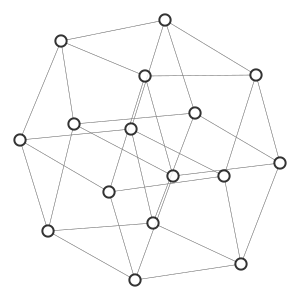

In [6]:
adj_matrix, struct_adj_matrix = ferro_lattice(16,0.4,0.7)
gm = Junet.Graph(struct_adj_matrix,directed=false)

plot(gm, size=(300,300), layout=layout_fruchterman_reingold(gm), node_color="white", node_border_color="black",
        node_border_width=2)

In [37]:
# create a non periodic lattice of size (m,n) for plotting purposes
function non_periodic_lattice(adj_matrix_gm::Array, m::Integer,n::Integer)
    # Map of the nodes in the plotted gm
    node_map_plot = Array{Int64,2}(m,n)
    n_spins = m*n
    adj_matrix_plot = zeros(n_spins,n_spins)
    node_map_plot[1:n_spins] = 1:n_spins
    
    # Map of the indices in the plotted map to the original map
    values_map_plot = Array{Int64,2}(m,n)
    values_map_plot[2:m-1,2:n-1] = 1:((m-2)*(n-2))
    
    # Specify edges between nodes at the boundary to be removed
    boundary_nodes = vcat(node_map_plot[:,1],node_map_plot[:,n],node_map_plot[1,2:n-1],node_map_plot[m,2:n-1])
    corner_nodes = [1,m,m*(n-1)+1,m*n]
    
    # Apply periodicity
    values_map_plot[2:(m-1),1] = copy(values_map_plot[2:(m-1),(n-1)])
    values_map_plot[2:(m-1),n] = copy(values_map_plot[2:(m-1),2])
    values_map_plot[1,2:(n-1)] = copy(values_map_plot[(m-1),2:(n-1)])
    values_map_plot[m,2:(n-1)] = copy(values_map_plot[2,2:(n-1)])
    values_map_plot[corner_nodes] = 0
    
    # Create edges
    for i = 1:(m*n)
        if !(i in corner_nodes)
            # top
            if ((i-1) % m) != 0 && !((i-1) in corner_nodes)
                adj_matrix_plot[i,i-1] = adj_matrix[values_map_plot[i],values_map_plot[i-1]]
            end
            # bottom
            if ((i+1) % m) != 1 && !((i+1) in corner_nodes)
                adj_matrix_plot[i,i+1] = adj_matrix[values_map_plot[i],values_map_plot[i+1]]
            end
            # right
            if (i+m) <= n_spins && !((i+m) in corner_nodes)
                adj_matrix_plot[i,i+m] = adj_matrix[values_map_plot[i],values_map_plot[i+m]]
            end
            # left
            if (i-m) > 0 && !((i-m) in corner_nodes)
                adj_matrix_plot[i,i-m] = adj_matrix[values_map_plot[i],values_map_plot[i-m]]
            end
        end
    end
    for i in boundary_nodes
        for j in boundary_nodes
            adj_matrix_plot[i,j] = 0
        end
    end
    
    struct_adj_matrix_plot = sign.(abs.(adj_matrix_plot))
    
    return adj_matrix_plot, struct_adj_matrix_plot
end

non_periodic_lattice (generic function with 1 method)

In [32]:
adj_matrix, struct_adj_matrix = ferro_lattice(16,0.4,0.7,true)
a = draw_periodic_lattice(adj_matrix,4,4,0.4,0.7,"ferro_lattice_impurity_gm.eps")
open("delim_file.txt", "w") do io
   writedlm(io, a)
end
display(issymmetric(a))

LoadError: [91mMethodError: no method matching start(::Void)[0m
Closest candidates are:
  start([91m::SimpleVector[39m) at essentials.jl:258
  start([91m::Base.MethodList[39m) at reflection.jl:560
  start([91m::ExponentialBackOff[39m) at error.jl:107
  ...[39m

In [39]:
sparse(adj_matrix)

16×16 SparseMatrixCSC{Float64,Int64} with 64 stored entries:
  [2 ,  1]  =  0.7
  [4 ,  1]  =  0.7
  [5 ,  1]  =  0.7
  [13,  1]  =  0.7
  [1 ,  2]  =  0.7
  [3 ,  2]  =  0.7
  [6 ,  2]  =  0.7
  [14,  2]  =  0.7
  [2 ,  3]  =  0.7
  [4 ,  3]  =  -0.4
  ⋮
  [10, 14]  =  0.7
  [13, 14]  =  0.7
  [15, 14]  =  0.7
  [3 , 15]  =  0.7
  [11, 15]  =  0.7
  [14, 15]  =  0.7
  [16, 15]  =  0.7
  [4 , 16]  =  0.7
  [12, 16]  =  0.7
  [13, 16]  =  0.7
  [15, 16]  =  0.7

In [18]:
function draw_periodic_lattice(adj_matrix::Array, m::Integer, n::Integer, α::Real, β::Real)
    # Get the graph that Junet can plot
    adj_matrix_junet, struct_adj_matrix_junet = non_periodic_lattice(adj_matrix,m+2,n+2)
    
    # Create Junet Graph
    gm = Junet.Graph(struct_adj_matrix_junet,directed=false)
    
    # Layout
    N = nodecount(gm)
    x = Array{Float64,1}(N)
    y = Array{Float64,1}(N)
    
    node_map_gm = zeros(m+2,n+2)
    node_map_gm[1:N] = 1:N
    
    for i=1:N
        y[i], x[i] = ind2sub(node_map_gm,find(isequal(i),node_map_gm)[1])
        if i in node_map_gm[:,1]
            x[i] += 0.3
        elseif i in node_map_gm[:,n+2]
            x[i] += -0.3
        elseif i in node_map_gm[1,:]
            y[i] += +0.3
        elseif i in node_map_gm[m+2,:]
            y[i] += -0.3
        end
    end
    
    # Decide node border colors
    node_border_colors_gm = Array{String,1}(N)
    for i=1:N
        if (i % (m+2) == 1) || (i % (m+2) == 0) || (i <= m+2) || (i >= (m+2)*(n+1))
            node_border_colors_gm[i] = "white"
        else
            node_border_colors_gm[i] = "black"
        end
    end
    
    plot(gm, size=(300,300), layout=(x,y), node_color="white", node_border_color=node_border_colors_gm,
        node_border_width=2, edge_color=[edge_color_spin_glass_gm(i, adj_matrix_junet, α, β) for i = 1:edgecount(gm)], 
        edge_width=2)
    
    return adj_matrix_junet
end

draw_periodic_lattice (generic function with 1 method)

In [10]:
triu(sparse(adj_matrix))

16×16 SparseMatrixCSC{Float64,Int64} with 32 stored entries:
  [1 ,  2]  =  0.7
  [2 ,  3]  =  0.7
  [1 ,  4]  =  0.7
  [3 ,  4]  =  -0.4
  [1 ,  5]  =  0.7
  [2 ,  6]  =  0.7
  [5 ,  6]  =  0.7
  [3 ,  7]  =  0.7
  [6 ,  7]  =  0.7
  [4 ,  8]  =  0.7
  ⋮
  [9 , 13]  =  0.7
  [2 , 14]  =  0.7
  [10, 14]  =  0.7
  [13, 14]  =  0.7
  [3 , 15]  =  0.7
  [11, 15]  =  0.7
  [14, 15]  =  0.7
  [4 , 16]  =  0.7
  [12, 16]  =  0.7
  [13, 16]  =  0.7
  [15, 16]  =  0.7

In [2]:
using GraphicalModelLearning
using LightGraphs
using Cairo
using Junet

include("beta_scaling.jl")

get_M_opt_glauber_dynamics (generic function with 5 methods)

In [3]:
N = 16
d = 3
α = 0.4
β = 0.7

0.7

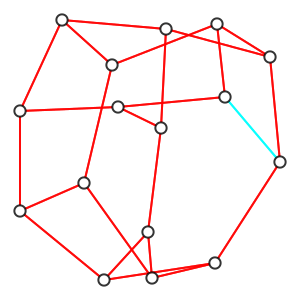

In [4]:
adj_matrix, struct_adj_matrix = ferro_random_regular_model(N,d,α,β,true)
gm = Junet.Graph(struct_adj_matrix,directed=false)

plot(gm, size=(300,300), layout=layout_fruchterman_reingold(gm), node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=2)

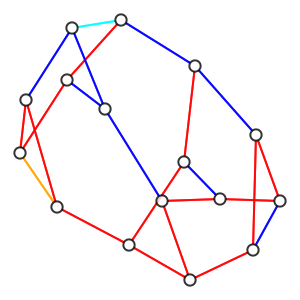

In [6]:
adj_matrix, struct_adj_matrix = spin_glass_random_regular_model(N,d,α,β)
gm = Junet.Graph(struct_adj_matrix,directed=false)

plot(gm, size=(300,300), layout=layout_fruchterman_reingold(gm), node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=2)

In [63]:
function replace_beta_spin_glass(adj_matrix::Array, α::Real, β::Real)
    mod_adj_matrix = deepcopy(adj_matrix)
    
    # Find values greater than α
    ind_β = find(adj_matrix.>α)
    mod_adj_matrix[ind_β] = β

    # Find values smaller than -α
    ind_neg_β = find(adj_matrix.<-α)
    mod_adj_matrix[ind_neg_β] = -β
    
    return mod_adj_matrix
end

replace_beta_spin_glass (generic function with 1 method)

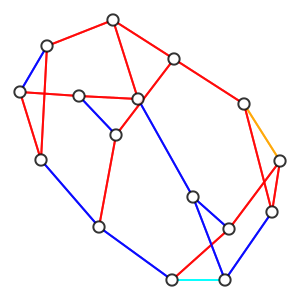

In [8]:
adj_matrix2 = replace_beta_gm(adj_matrix,α,0.9)
gm = Junet.Graph(struct_adj_matrix,directed=false)

plot(gm, size=(300,300), layout=layout_fruchterman_reingold(gm), node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix2, α, 0.9) for i = 1:edgecount(gm)],
    edge_width=2)

In [9]:
writedlm("spin_glass_random_regular_adj_matrix.txt",adj_matrix)

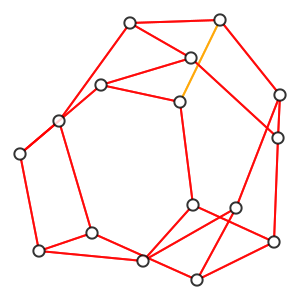

In [19]:
adj_matrix3, struct_adj_matrix3 = ferro_random_regular_model(N,d,α,β)
gm = Junet.Graph(struct_adj_matrix3,directed=false)

plot(gm, size=(300,300), layout=layout_fruchterman_reingold(gm), node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix3, α, β) for i = 1:edgecount(gm)],
    edge_width=2)

In [20]:
adj_matrix3, struct_adj_matrix3 = ferro_random_regular_model(24,4,0.4,0.7,true)
gm = Junet.Graph(struct_adj_matrix3,directed=false)

plot(gm, size=(300,300), layout=layout_fruchterman_reingold(gm), node_color="white", node_border_color="black",
    node_border_width=2, edge_color="black", edge_width=2,format=:eps, file="example_spin_system.eps")

In [23]:
file_plot_gm = "test1.eps"
#adj_matrix, struct_adj_matrix = ferro_lattice(N,α,β,true)
adj_matrix, struct_adj_matrix = spin_glass_lattice(N,α,β)
m = n = Int(sqrt(N))
draw_periodic_lattice(adj_matrix,m,n,α,β,file_plot_gm)

In [12]:
adj_matrix = [0.0 0.9 0.1; 0.9 0.0 0.1; 0.1 0.1 0.0]
gm = Junet.Graph(0.5*sign.(adj_matrix),directed=false)

plot(gm, size=(300,300), layout=layout_fruchterman_reingold(gm), node_color="white", node_border_color="black",
        node_border_width=3, edge_width=3, edge_color="black",format=:eps, file="three_spin_system.eps")